In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
#利用奇异值分解压缩矩阵
def imgCompress(channel,percent):
    U, sigma, V_T = np.linalg.svd(channel)
    m = U.shape[0]
    n = V_T.shape[0]
    reChannel = np.zeros((m,n))

    for k in range(len(sigma)):
        reChannel = reChannel + sigma[k]* np.dot(U[:,k].reshape(m,1),V_T[k,:].reshape(1,n))
        if float(k)/len(sigma) > percent:
            reChannel[reChannel < 0] = 0
            reChannel[reChannel > 255] = 255
            break

    return np.rint(reChannel).astype("uint8")

In [4]:
n=0
oriImage = Image.open(r'lena.jpg', 'r')
oriImage_n=Image.open('noisy_img.png','r')
if n==1:
    oriImage=oriImage_n
imgArray = np.array(oriImage)

R = imgArray[:, :, 0]
G = imgArray[:, :, 1]
B = imgArray[:, :, 2]
print(B.dtype)
# A = imgArray[:, :, 3]

uint8


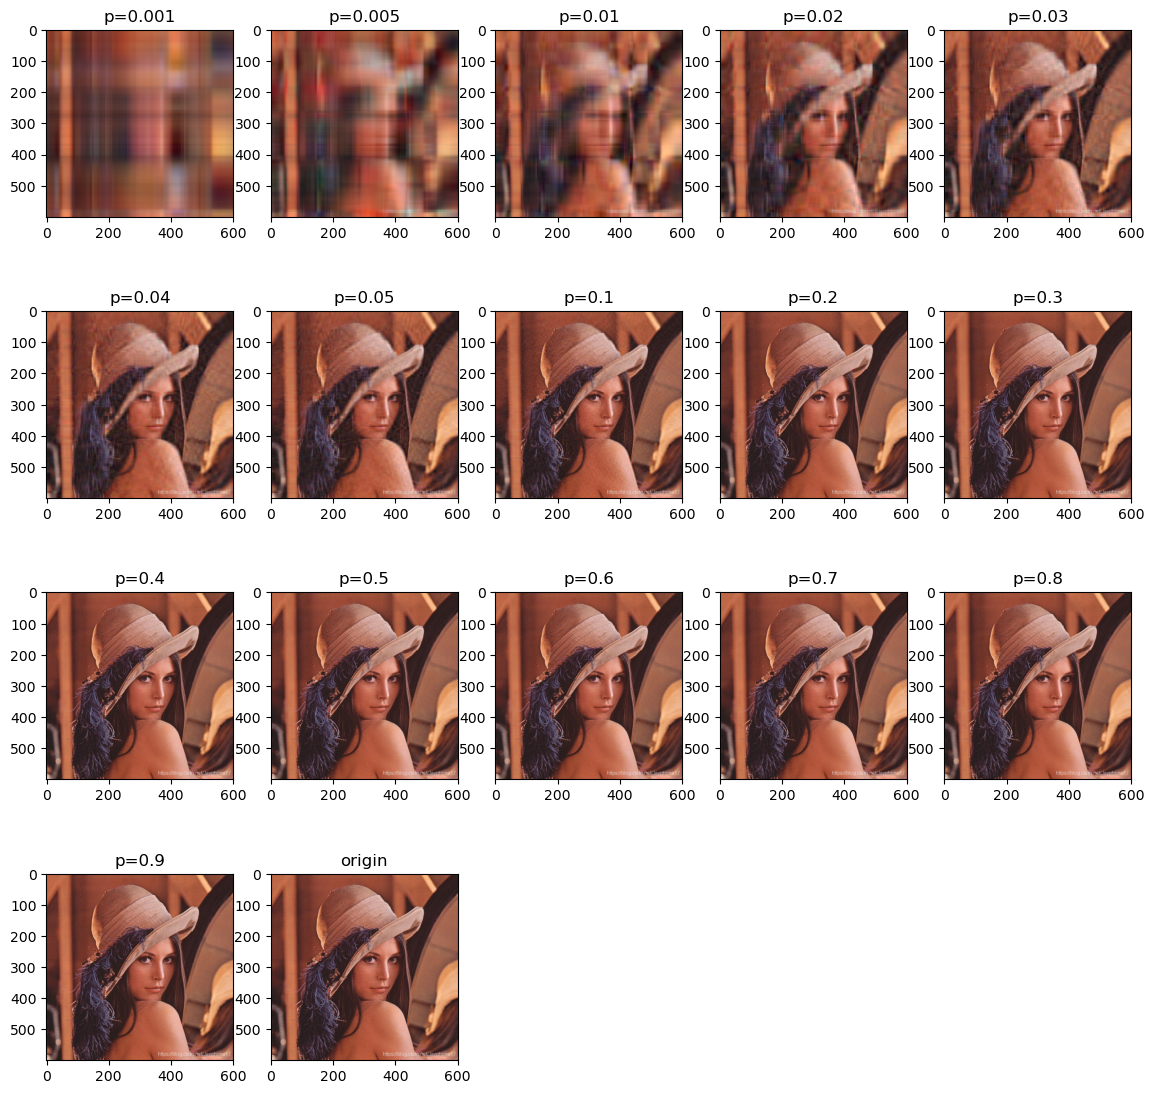

In [5]:
if n==0:
    reI=np.empty(shape=(16,600,601,3),dtype=np.uint8)
    i=0
    temp=[0.001,0.005,0.01,0.02,0.03,0.04,0.05,
              0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for p in temp:
        reR = imgCompress(R, p)
        reG = imgCompress(G, p)
        reB = imgCompress(B, p)
        # reA = imgCompress(A, p)
        reI[i] = np.stack((reR, reG, reB), 2)
        #Image.fromarray(reI[i]).save("{}".format(p)+"img.png")
        i=i+1
    plt.figure(figsize=(14,14),dpi=100)
    for i in range(16):
        plt.subplot(4,5,i+1)
        plt.imshow(Image.fromarray(reI[i]))
        plt.title('p={a}'.format(a=temp[i]))
    plt.subplot(4,5,17)
    plt.imshow(oriImage)
    plt.title('origin')
    plt.savefig('subplot.png')
else:
    reI=np.empty(shape=(16,600,601,3),dtype=np.uint8)
    i=0
    temp=[0.001,0.005,0.01,0.02,0.03,0.04,0.05,
              0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for p in temp:
        reR = imgCompress(R, p)
        reG = imgCompress(G, p)
        reB = imgCompress(B, p)
        # reA = imgCompress(A, p)
        reI[i] = np.stack((reR, reG, reB), 2)
        Image.fromarray(reI[i]).save("{}".format(p)+"img.png")
        i=i+1

array([159,  75,  51], dtype=uint8)

In [108]:
# plt.figure(figsize=(14,14),dpi=100)
# for i in range(16):
#     plt.subplot(4,5,i+1)
#     plt.imshow(Image.fromarray(reI[i]))
#     plt.title('p={a}'.format(a=temp[i]))
# plt.subplot(4,5,17)
# plt.imshow(oriImage)
# plt.title('origin')
# plt.savefig('subplot.png')